In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
%matplotlib inline
import re
import tensorflow as tf
from keras.callbacks import ModelCheckpoint

In [2]:
# Read data
data_w = pd.read_csv("zillow_wake_co.csv")
data_d = pd.read_csv("zillow_durham_co_df.csv")

In [3]:
# Concatenate both dataframes
data = pd.concat([data_w, data_d], axis=0)
data

,props.dateSold,props.propertyType,props.lotAreaValue,props.address,props.variableData.text,props.variableData.type,props.zestimate,props.imgSrc,props.price,props.bedrooms,...,props.daysOnZillow,props.bathrooms,props.livingArea,props.country,props.currency,props.lotAreaUnit,props.hasImage,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,1682665200000,SINGLE_FAMILY,0.920000,"7525 Matherly Dr, Wake Forest, NC 27587",Sold 04/28/2023,RECENTLY_SOLD,471400.0,https://photos.zillowstatic.com/fp/f5b8c1b3a5e...,471900,3.0,...,-1,3.0,2245.0,USA,USD,acres,True,NaN,NaN,NaN
1,1682665200000,SINGLE_FAMILY,0.350000,"132 W Holding Ave, Wake Forest, NC 27587",Sold 04/28/2023,RECENTLY_SOLD,373700.0,https://photos.zillowstatic.com/fp/cc3dddbd058...,375000,3.0,...,-1,3.0,1815.0,USA,USD,acres,True,NaN,NaN,NaN
2,1682665200000,SINGLE_FAMILY,0.429982,"2809 Stirrup Ct, Wake Forest, NC 27587",Sold 04/28/2023,RECENTLY_SOLD,446000.0,https://maps.googleapis.com/maps/api/staticmap...,382500,3.0,...,-1,3.0,2350.0,USA,USD,acres,True,NaN,NaN,NaN
3,1682665200000,SINGLE_FAMILY,0.260000,"900 Finchurch Cir, Wake Forest, NC 27587",Sold 04/28/2023,RECENTLY_SOLD,329700.0,https://photos.zillowstatic.com/fp/c16d597cdf7...,330000,3.0,...,-1,2.0,1332.0,USA,USD,acres,True,NaN,NaN,NaN
4,1682665200000,SINGLE_FAMILY,0.920000,"2812 Kimmon Way, Wake Forest, NC 27587",Sold 04/28/2023,RECENTLY_SOLD,677600.0,https://photos.zillowstatic.com/fp/bf2640f3101...,680000,4.0,...,-1,3.0,2600.0,USA,USD,acres,True,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4303,1641974400000,SINGLE_FAMILY,0.480000,"4 S Nipper Ct, Durham, NC 27704",Sold 01/12/2022,RECENTLY_SOLD,298800.0,https://photos.zillowstatic.com/fp/697f70fb343...,245000,3.0,...,-1,2.0,1310.0,USA,USD,acres,True,NaN,NaN,NaN
4304,1641974400000,SINGLE_FAMILY,8276.400000,"2004 Buffalo Way, Durham, NC 27704",Sold 01/12/2022,RECENTLY_SOLD,301600.0,https://photos.zillowstatic.com/fp/788db1bbbdd...,270000,3.0,...,-1,3.0,1263.0,USA,USD,sqft,True,NaN,NaN,NaN
4305,1641974400000,SINGLE_FAMILY,8276.400000,"3008 Kenan Rd, Durham, NC 27704",Sold 01/12/2022,RECENTLY_SOLD,492800.0,https://photos.zillowstatic.com/fp/98eedd159e7...,470000,3.0,...,-1,3.0,1772.0,USA,USD,sqft,True,NaN,NaN,NaN
4306,1641888000000,SINGLE_FAMILY,0.326000,"703 W Carver St, Durham, NC 27704",Sold 01/11/2022,RECENTLY_SOLD,348300.0,https://photos.zillowstatic.com/fp/1ead45e8823...,332000,3.0,...,-1,2.0,1408.0,USA,USD,acres,True,NaN,NaN,NaN


In [4]:
# If props.AreaUnit is = to sqft then convert it to acres
data.loc[(data['props.lotAreaUnit'] == 'sqft'), 'props.lotAreaValue'] /= 43560
data

,props.dateSold,props.propertyType,props.lotAreaValue,props.address,props.variableData.text,props.variableData.type,props.zestimate,props.imgSrc,props.price,props.bedrooms,...,props.daysOnZillow,props.bathrooms,props.livingArea,props.country,props.currency,props.lotAreaUnit,props.hasImage,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,1682665200000,SINGLE_FAMILY,0.920000,"7525 Matherly Dr, Wake Forest, NC 27587",Sold 04/28/2023,RECENTLY_SOLD,471400.0,https://photos.zillowstatic.com/fp/f5b8c1b3a5e...,471900,3.0,...,-1,3.0,2245.0,USA,USD,acres,True,NaN,NaN,NaN
1,1682665200000,SINGLE_FAMILY,0.350000,"132 W Holding Ave, Wake Forest, NC 27587",Sold 04/28/2023,RECENTLY_SOLD,373700.0,https://photos.zillowstatic.com/fp/cc3dddbd058...,375000,3.0,...,-1,3.0,1815.0,USA,USD,acres,True,NaN,NaN,NaN
2,1682665200000,SINGLE_FAMILY,0.429982,"2809 Stirrup Ct, Wake Forest, NC 27587",Sold 04/28/2023,RECENTLY_SOLD,446000.0,https://maps.googleapis.com/maps/api/staticmap...,382500,3.0,...,-1,3.0,2350.0,USA,USD,acres,True,NaN,NaN,NaN
3,1682665200000,SINGLE_FAMILY,0.260000,"900 Finchurch Cir, Wake Forest, NC 27587",Sold 04/28/2023,RECENTLY_SOLD,329700.0,https://photos.zillowstatic.com/fp/c16d597cdf7...,330000,3.0,...,-1,2.0,1332.0,USA,USD,acres,True,NaN,NaN,NaN
4,1682665200000,SINGLE_FAMILY,0.920000,"2812 Kimmon Way, Wake Forest, NC 27587",Sold 04/28/2023,RECENTLY_SOLD,677600.0,https://photos.zillowstatic.com/fp/bf2640f3101...,680000,4.0,...,-1,3.0,2600.0,USA,USD,acres,True,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4303,1641974400000,SINGLE_FAMILY,0.480000,"4 S Nipper Ct, Durham, NC 27704",Sold 01/12/2022,RECENTLY_SOLD,298800.0,https://photos.zillowstatic.com/fp/697f70fb343...,245000,3.0,...,-1,2.0,1310.0,USA,USD,acres,True,NaN,NaN,NaN
4304,1641974400000,SINGLE_FAMILY,0.190000,"2004 Buffalo Way, Durham, NC 27704",Sold 01/12/2022,RECENTLY_SOLD,301600.0,https://photos.zillowstatic.com/fp/788db1bbbdd...,270000,3.0,...,-1,3.0,1263.0,USA,USD,sqft,True,NaN,NaN,NaN
4305,1641974400000,SINGLE_FAMILY,0.190000,"3008 Kenan Rd, Durham, NC 27704",Sold 01/12/2022,RECENTLY_SOLD,492800.0,https://photos.zillowstatic.com/fp/98eedd159e7...,470000,3.0,...,-1,3.0,1772.0,USA,USD,sqft,True,NaN,NaN,NaN
4306,1641888000000,SINGLE_FAMILY,0.326000,"703 W Carver St, Durham, NC 27704",Sold 01/11/2022,RECENTLY_SOLD,348300.0,https://photos.zillowstatic.com/fp/1ead45e8823...,332000,3.0,...,-1,2.0,1408.0,USA,USD,acres,True,NaN,NaN,NaN


In [5]:
# Extract zip code from address
data['zip'] = data['props.address'].str.extract('(?<=NC )([^,]*)(?=$)', expand = True)
data['zip'].astype(str).astype(int)
data['zip'].head()

0    27587
1    27587
2    27587
3    27587
4    27587
Name: zip, dtype: object

In [6]:
# Extract city code from address
data['city'] = data['props.address'].str.extract('(?<=, )([^,]*)(?=,)', expand = True)   
data['city'].head()

0    Wake Forest
1    Wake Forest
2    Wake Forest
3    Wake Forest
4    Wake Forest
Name: city, dtype: object

In [7]:
# Create data_df dataframe from select columns in data dataframe
data_df = data[['city','zip','props.zestimate','props.propertyType','props.bedrooms','props.bathrooms','props.livingArea','props.lotAreaValue','props.latitude','props.longitude']]

# Drop rows where bedrooms, bathrooms, or livingArea = 0
data_df = data_df[data_df['props.bedrooms'] != 0]
data_df = data_df[data_df['props.bathrooms'] != 0]
data_df = data_df[data_df['props.livingArea'] != 0]

# Drop NA
data_df = data_df.dropna()

data_df.head()

,city,zip,props.zestimate,props.propertyType,props.bedrooms,props.bathrooms,props.livingArea,props.lotAreaValue,props.latitude,props.longitude
0,Wake Forest,27587,471400.0,SINGLE_FAMILY,3.0,3.0,2245.0,0.920000,35.997555,-78.544770
1,Wake Forest,27587,373700.0,SINGLE_FAMILY,3.0,3.0,1815.0,0.350000,35.972195,-78.516880
2,Wake Forest,27587,446000.0,SINGLE_FAMILY,3.0,3.0,2350.0,0.429982,35.937810,-78.527550
3,Wake Forest,27587,329700.0,SINGLE_FAMILY,3.0,2.0,1332.0,0.260000,35.994972,-78.504776
4,Wake Forest,27587,677600.0,SINGLE_FAMILY,4.0,3.0,2600.0,0.920000,36.019070,-78.553570


In [8]:
# Change dtypes of columns
data_df['zip'] = data_df['zip'].astype(str).astype(int)
data_df['props.bedrooms'] = data_df['props.bedrooms'].astype(int)
data_df['props.bathrooms'] = data_df['props.bathrooms'].astype(int)
data_df.dtypes

city                   object
zip                     int32
props.zestimate       float64
props.propertyType     object
props.bedrooms          int32
props.bathrooms         int32
props.livingArea      float64
props.lotAreaValue    float64
props.latitude        float64
props.longitude       float64
dtype: object

In [9]:
# Describe data_df
data_df.describe()

,zip,props.zestimate,props.bedrooms,props.bathrooms,props.livingArea,props.lotAreaValue,props.latitude,props.longitude
count,8782.000000,8.782000e+03,8782.000000,8782.000000,8782.000000,8782.000000,8782.000000,8782.000000
mean,27634.991004,5.110381e+05,3.437144,2.729333,2187.121726,0.497488,35.888049,-78.794412
std,76.116451,2.805756e+05,0.847486,1.019434,1320.521611,1.826194,0.138120,0.147880
min,27502.000000,3.220000e+04,1.000000,1.000000,1.000000,0.000000,35.450110,-79.043860
25%,27571.000000,3.460000e+05,3.000000,2.000000,1454.250000,0.167000,35.776990,-78.911600
50%,27616.000000,4.453000e+05,3.000000,3.000000,1973.500000,0.250000,35.922020,-78.847495
75%,27705.000000,5.927000e+05,4.000000,3.000000,2683.000000,0.460000,35.996836,-78.690742
max,27713.000000,5.627300e+06,8.000000,10.000000,73140.000000,82.239991,36.145874,-78.401010


In [10]:
# Determine # of unique values per column
data_df.nunique()

city                    15
zip                     30
props.zestimate       4901
props.propertyType       7
props.bedrooms           8
props.bathrooms         10
props.livingArea      3000
props.lotAreaValue    1327
props.latitude        7766
props.longitude       7342
dtype: int64

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

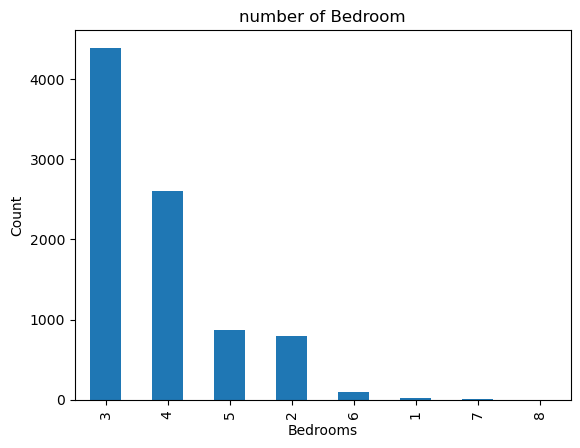

In [11]:
data_df['props.bedrooms'].value_counts().plot(kind='bar')
plt.title('number of Bedroom')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
sns.despine

Text(0.5, 1.0, 'Price vs Square Feet')

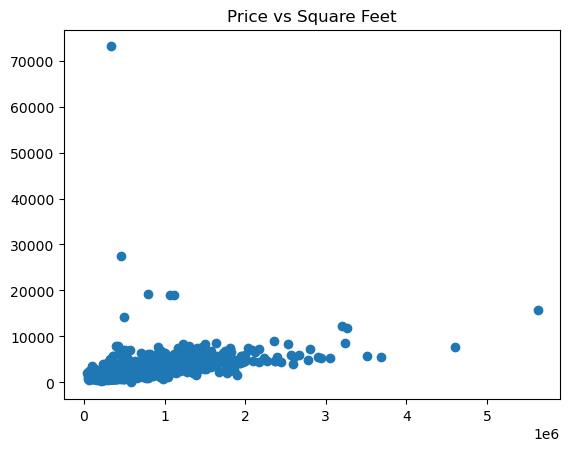

In [12]:
plt.scatter(data_df["props.zestimate"],data_df["props.livingArea"])
plt.title("Price vs Square Feet")

In [13]:
# divide price into different bins -- binning
data_df['quantile_4'] = pd.qcut(data_df['props.zestimate'], q=4)
data_df['quantile_10'] = pd.qcut(data_df['props.zestimate'], q=10, precision=0)
data_df.head()

,city,zip,props.zestimate,props.propertyType,props.bedrooms,props.bathrooms,props.livingArea,props.lotAreaValue,props.latitude,props.longitude,quantile_4,quantile_10
0,Wake Forest,27587,471400.0,SINGLE_FAMILY,3,3,2245.0,0.920000,35.997555,-78.544770,"(445300.0, 592700.0]","(445300.0, 492860.0]"
1,Wake Forest,27587,373700.0,SINGLE_FAMILY,3,3,1815.0,0.350000,35.972195,-78.516880,"(346000.0, 445300.0]","(365300.0, 403040.0]"
2,Wake Forest,27587,446000.0,SINGLE_FAMILY,3,3,2350.0,0.429982,35.937810,-78.527550,"(445300.0, 592700.0]","(445300.0, 492860.0]"
3,Wake Forest,27587,329700.0,SINGLE_FAMILY,3,2,1332.0,0.260000,35.994972,-78.504776,"(32199.999, 346000.0]","(326300.0, 365300.0]"
4,Wake Forest,27587,677600.0,SINGLE_FAMILY,4,3,2600.0,0.920000,36.019070,-78.553570,"(592700.0, 5627300.0]","(646380.0, 798360.0]"


In [14]:
# view the values of the bins and the coint in each
data_df['quantile_4'].value_counts()

(32199.999, 346000.0]    2198
(346000.0, 445300.0]     2197
(592700.0, 5627300.0]    2195
(445300.0, 592700.0]     2192
Name: quantile_4, dtype: int64

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

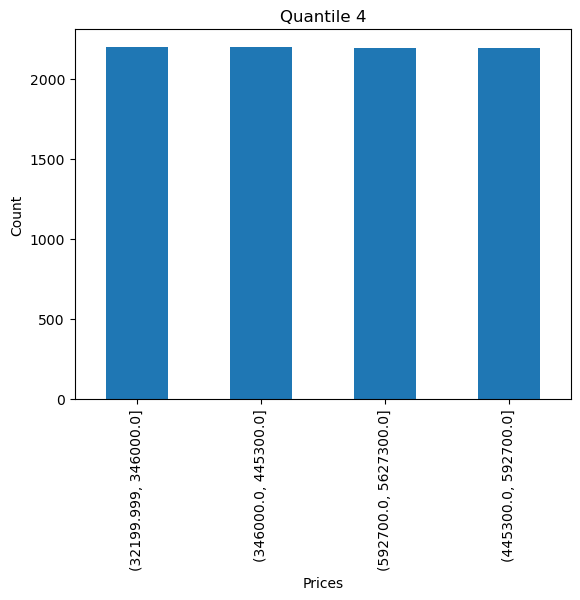

In [15]:
# plot quantile_4 with count
data_df['quantile_4'].value_counts().plot(kind='bar')
plt.title('Quantile 4')
plt.xlabel('Prices')
plt.ylabel('Count')
sns.despine

In [16]:
# view the values of the bins and the coint in each
data_df['quantile_10'].value_counts()

(403040.0, 445300.0]     882
(32199.0, 280500.0]      880
(326300.0, 365300.0]     879
(798360.0, 5627300.0]    879
(280500.0, 326300.0]     878
(492860.0, 551470.0]     878
(551470.0, 646380.0]     878
(646380.0, 798360.0]     878
(365300.0, 403040.0]     876
(445300.0, 492860.0]     874
Name: quantile_10, dtype: int64

In [17]:
# pd.cut seperate into 4 bins based on price not count
data_df['cuts_4'] = pd.cut(data_df['props.zestimate'], bins=4).value_counts()
data_df['cuts_4'].value_counts()

Series([], Name: cuts_4, dtype: int64)

In [18]:
# pd.cut seperate into 10 bins based on price not count
data_df['cuts_10'] = pd.cut(data_df['props.zestimate'], bins=10)
data_df['cuts_10'].value_counts()

(26604.9, 591710.0]       6575
(591710.0, 1151220.0]     1936
(1151220.0, 1710730.0]     209
(1710730.0, 2270240.0]      39
(2270240.0, 2829750.0]      13
(2829750.0, 3389260.0]       6
(3389260.0, 3948770.0]       2
(4508280.0, 5067790.0]       1
(5067790.0, 5627300.0]       1
(3948770.0, 4508280.0]       0
Name: cuts_10, dtype: int64

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

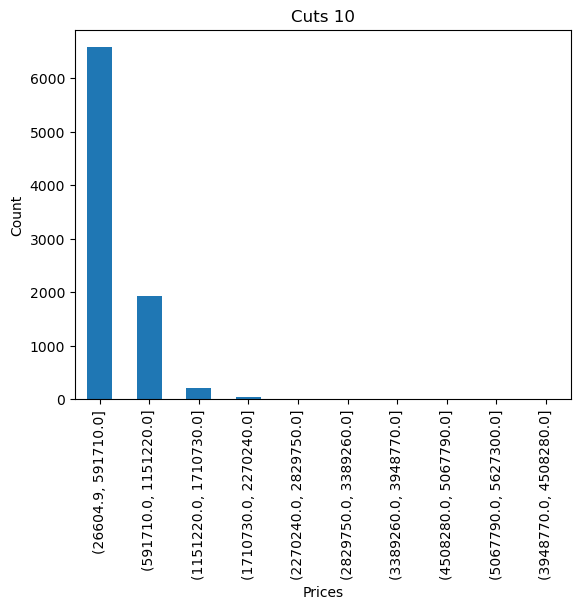

In [19]:
# plot cuts_10 with count
data_df['cuts_10'].value_counts().plot(kind='bar')
plt.title('Cuts 10')
plt.xlabel('Prices')
plt.ylabel('Count')
sns.despine

After exploring two seperate ways to bin the data, qcut 4 appears to be more appealing

In [20]:
# Label the bins for ML
data_df['bin'] = pd.qcut(data_df['props.zestimate'], q=4, labels=False)
data_df.head()

,city,zip,props.zestimate,props.propertyType,props.bedrooms,props.bathrooms,props.livingArea,props.lotAreaValue,props.latitude,props.longitude,quantile_4,quantile_10,cuts_4,cuts_10,bin
0,Wake Forest,27587,471400.0,SINGLE_FAMILY,3,3,2245.0,0.920000,35.997555,-78.544770,"(445300.0, 592700.0]","(445300.0, 492860.0]",NaN,"(26604.9, 591710.0]",2
1,Wake Forest,27587,373700.0,SINGLE_FAMILY,3,3,1815.0,0.350000,35.972195,-78.516880,"(346000.0, 445300.0]","(365300.0, 403040.0]",NaN,"(26604.9, 591710.0]",1
2,Wake Forest,27587,446000.0,SINGLE_FAMILY,3,3,2350.0,0.429982,35.937810,-78.527550,"(445300.0, 592700.0]","(445300.0, 492860.0]",NaN,"(26604.9, 591710.0]",2
3,Wake Forest,27587,329700.0,SINGLE_FAMILY,3,2,1332.0,0.260000,35.994972,-78.504776,"(32199.999, 346000.0]","(326300.0, 365300.0]",NaN,"(26604.9, 591710.0]",0
4,Wake Forest,27587,677600.0,SINGLE_FAMILY,4,3,2600.0,0.920000,36.019070,-78.553570,"(592700.0, 5627300.0]","(646380.0, 798360.0]",NaN,"(591710.0, 1151220.0]",3


In [21]:
#drop the unwanted binning columns
data_df = data_df.drop(['cuts_4','cuts_10','quantile_10'],axis=1)
data_df

,city,zip,props.zestimate,props.propertyType,props.bedrooms,props.bathrooms,props.livingArea,props.lotAreaValue,props.latitude,props.longitude,quantile_4,bin
0,Wake Forest,27587,471400.0,SINGLE_FAMILY,3,3,2245.0,0.920000,35.997555,-78.544770,"(445300.0, 592700.0]",2
1,Wake Forest,27587,373700.0,SINGLE_FAMILY,3,3,1815.0,0.350000,35.972195,-78.516880,"(346000.0, 445300.0]",1
2,Wake Forest,27587,446000.0,SINGLE_FAMILY,3,3,2350.0,0.429982,35.937810,-78.527550,"(445300.0, 592700.0]",2
3,Wake Forest,27587,329700.0,SINGLE_FAMILY,3,2,1332.0,0.260000,35.994972,-78.504776,"(32199.999, 346000.0]",0
4,Wake Forest,27587,677600.0,SINGLE_FAMILY,4,3,2600.0,0.920000,36.019070,-78.553570,"(592700.0, 5627300.0]",3
...,...,...,...,...,...,...,...,...,...,...,...,...
4303,Durham,27704,298800.0,SINGLE_FAMILY,3,2,1310.0,0.480000,36.037470,-78.869610,"(32199.999, 346000.0]",0
4304,Durham,27704,301600.0,SINGLE_FAMILY,3,3,1263.0,0.190000,36.019485,-78.853900,"(32199.999, 346000.0]",0
4305,Durham,27704,492800.0,SINGLE_FAMILY,3,3,1772.0,0.190000,36.040714,-78.908264,"(445300.0, 592700.0]",2
4306,Durham,27704,348300.0,SINGLE_FAMILY,3,2,1408.0,0.326000,36.039692,-78.908960,"(346000.0, 445300.0]",1


In [22]:
# categorical columns
categorical_cols = ['city','props.propertyType']

data_cat_df= pd.get_dummies(data_df, columns = categorical_cols)
data_cat_df

,zip,props.zestimate,props.bedrooms,props.bathrooms,props.livingArea,props.lotAreaValue,props.latitude,props.longitude,quantile_4,bin,...,city_Raleigh,city_Rolesville,city_Wake Forest,props.propertyType_APARTMENT,props.propertyType_CONDO,props.propertyType_LOT,props.propertyType_MANUFACTURED,props.propertyType_MULTI_FAMILY,props.propertyType_SINGLE_FAMILY,props.propertyType_TOWNHOUSE
0,27587,471400.0,3,3,2245.0,0.920000,35.997555,-78.544770,"(445300.0, 592700.0]",2,...,0,0,1,0,0,0,0,0,1,0
1,27587,373700.0,3,3,1815.0,0.350000,35.972195,-78.516880,"(346000.0, 445300.0]",1,...,0,0,1,0,0,0,0,0,1,0
2,27587,446000.0,3,3,2350.0,0.429982,35.937810,-78.527550,"(445300.0, 592700.0]",2,...,0,0,1,0,0,0,0,0,1,0
3,27587,329700.0,3,2,1332.0,0.260000,35.994972,-78.504776,"(32199.999, 346000.0]",0,...,0,0,1,0,0,0,0,0,1,0
4,27587,677600.0,4,3,2600.0,0.920000,36.019070,-78.553570,"(592700.0, 5627300.0]",3,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4303,27704,298800.0,3,2,1310.0,0.480000,36.037470,-78.869610,"(32199.999, 346000.0]",0,...,0,0,0,0,0,0,0,0,1,0
4304,27704,301600.0,3,3,1263.0,0.190000,36.019485,-78.853900,"(32199.999, 346000.0]",0,...,0,0,0,0,0,0,0,0,1,0
4305,27704,492800.0,3,3,1772.0,0.190000,36.040714,-78.908264,"(445300.0, 592700.0]",2,...,0,0,0,0,0,0,0,0,1,0
4306,27704,348300.0,3,2,1408.0,0.326000,36.039692,-78.908960,"(346000.0, 445300.0]",1,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
##############################

In [30]:
# Create dataframe that contains all variables except the zestimates
train_data = data_cat_df.drop(['props.zestimate','quantile_4','bin'], axis=1)
train_data

,zip,props.bedrooms,props.bathrooms,props.livingArea,props.lotAreaValue,props.latitude,props.longitude,city_Apex,city_Cary,city_Chapel Hill,...,city_Raleigh,city_Rolesville,city_Wake Forest,props.propertyType_APARTMENT,props.propertyType_CONDO,props.propertyType_LOT,props.propertyType_MANUFACTURED,props.propertyType_MULTI_FAMILY,props.propertyType_SINGLE_FAMILY,props.propertyType_TOWNHOUSE
0,27587,3,3,2245.0,0.920000,35.997555,-78.544770,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,27587,3,3,1815.0,0.350000,35.972195,-78.516880,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,27587,3,3,2350.0,0.429982,35.937810,-78.527550,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,27587,3,2,1332.0,0.260000,35.994972,-78.504776,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,27587,4,3,2600.0,0.920000,36.019070,-78.553570,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4303,27704,3,2,1310.0,0.480000,36.037470,-78.869610,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4304,27704,3,3,1263.0,0.190000,36.019485,-78.853900,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4305,27704,3,3,1772.0,0.190000,36.040714,-78.908264,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4306,27704,3,2,1408.0,0.326000,36.039692,-78.908960,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
##################################
##   Random Forest Classifier   ##
##################################

In [24]:
# Dependencies for Random Forest Classifier
##from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [49]:
# Train-Test-Split data
from sklearn.model_selection import train_test_split
#
# Create training/ test data split
#
X= train_data
y= data_df['bin']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)
#
# Create an instance of Random Forest Classifier
#
forest = RandomForestClassifier(criterion='gini',
                                 n_estimators=100,
                                 random_state=42,
                                 n_jobs=2)
#
# Fit the model
#
forest.fit(X_train, y_train)
 
#
# Measure model performance
#
y_pred = forest.predict(X_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.719


In [47]:
# Use GridSearch 
from sklearn.model_selection import GridSearchCV
#
# Create an instance of Random Forest Classifier
#
forest = RandomForestClassifier()
#
# Create parameters for GridSearch & train the model
#
parameters = {'max_depth':[2, 3, 4, 5], 'n_estimators':[5, 50, 100, 500], 'n_jobs':[1, 2, 3]}
rf = GridSearchCV(forest, parameters, cv=5)
rf.fit(X_train, y_train)
print('Best Estimator: ', rf.best_estimator_)
print('Best Score: ',rf.best_score_)
print('Best Parameters: ', rf.best_params_)

Best Estimator:  RandomForestClassifier(max_depth=5, n_estimators=500, n_jobs=3)
Best Score:  0.6284355712556311
Best Parameters:  {'max_depth': 5, 'n_estimators': 500, 'n_jobs': 3}


In [ ]:
#############################
##
############################

In [50]:
from sklearn.neighbors import KNeighborsClassifier

In [67]:
knn5 = KNeighborsClassifier(n_neighbors = 5)
knn1 = KNeighborsClassifier(n_neighbors=1)

In [68]:
knn5.fit(X_train, y_train)
knn1.fit(X_train, y_train)

y_pred_5 = knn5.predict(X_test)
y_pred_1 = knn1.predict(X_test)

In [69]:
from sklearn.metrics import accuracy_score
print("Accuracy with k=5", accuracy_score(y_test, y_pred_5)*100)
print("Accuracy with k=1", accuracy_score(y_test, y_pred_1)*100)

Accuracy with k=5 57.65509391007399
Accuracy with k=1 56.74445076835515


In [ ]:
#################################
##  Machine Learning Pipeline  ##
#################################

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


model_pipeline = []
model_pipeline.append(LogisticRegression(solver='liblinear'))
model_pipeline.append(SVC())
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(DecisionTreeClassifier())
model_pipeline.append(RandomForestClassifier())
model_pipeline.append(GaussianNB())

In [79]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

model_list = ['Logistic Regression','SVM', 'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes']
acc_list = []
auc_list = []
cm_list = []

for model in model_pipeline:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc_list.append(accuracy_score(y_test, y_pred))
    #fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)
    #auc_list.append(round(metrics.auc(fpr, tpr),2))
    cm_list.append(confusion_matrix(y_test, y_pred))

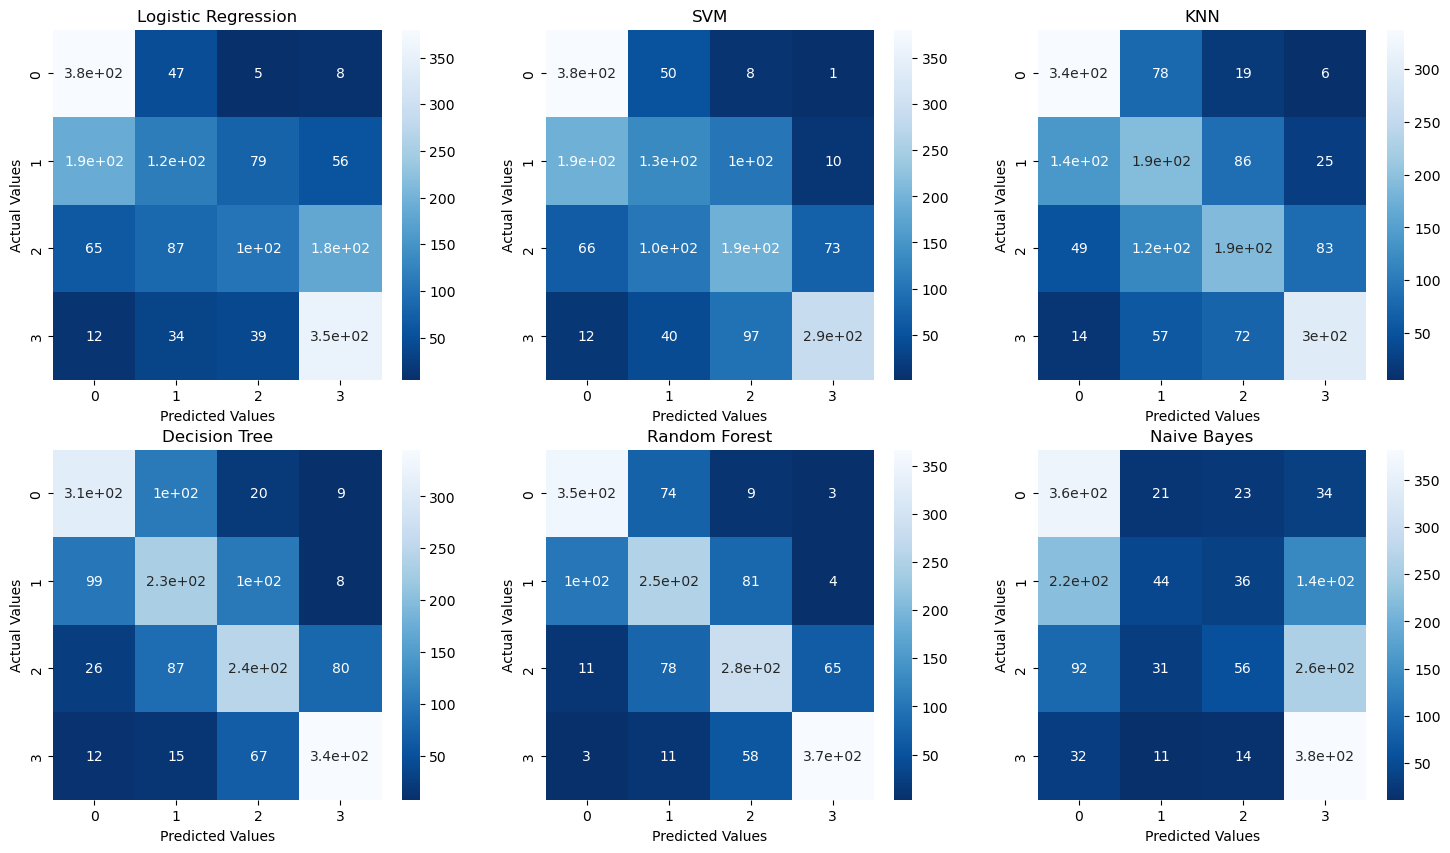

In [80]:
## plot confusion matrix
fig = plt.figure(figsize= (18,10))
for i in range(len(cm_list)):
    cm = cm_list[i]
    model = model_list[i]
    sub = fig.add_subplot(2, 3, i+1).set_title(model)
    cm_plot = sns.heatmap(cm, annot=True, cmap = 'Blues_r')
    cm_plot.set_xlabel('Predicted Values')
    cm_plot.set_ylabel('Actual Values')

In [108]:
# accuracy and auc
result_df = pd.DataFrame({'Model':model_list, 'Accuracy': acc_list})
result_df

,Model,Accuracy
0,Logistic Regression,0.542971
1,SVM,0.568014
2,KNN,0.576551
3,Decision Tree,0.642573
4,Random Forest,0.715993
5,Naive Bayes,0.480364


In [82]:
# Create a StandardScaler instances
from sklearn.preprocessing import StandardScaler,OneHotEncoder
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [83]:
# Define model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 50

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                2400      
                                                                 
 dense_1 (Dense)             (None, 50)                4050      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 6,501
Trainable params: 6,501
Non-trainable params: 0
_________________________________________________________________


In [84]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [85]:
# Create a callback that saves the model's weights every 5 epochs
checkpoint = ModelCheckpoint("best_model.hdf5", monitor='loss', verbose=1,
    save_best_only=True, mode='auto', period=5)

In [86]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,
                   epochs=100,callbacks=[checkpoint])

Epoch 1/100
220/220 [==============================] - 1s 1ms/step - loss: -71.9375 - accuracy: 0.2581
Epoch 2/100
220/220 [==============================] - 0s 1ms/step - loss: -1489.5717 - accuracy: 0.3009
Epoch 3/100
220/220 [==============================] - 0s 1ms/step - loss: -7051.0771 - accuracy: 0.3199
Epoch 4/100
220/220 [==============================] - 0s 946us/step - loss: -19346.8496 - accuracy: 0.3389
Epoch 5/100
205/220 [==========================>...] - ETA: 0s - loss: -39516.6250 - accuracy: 0.3471
Epoch 5: loss improved from inf to -40383.20312, saving model to best_model.hdf5
220/220 [==============================] - 0s 1ms/step - loss: -40383.2031 - accuracy: 0.3451
Epoch 6/100
220/220 [==============================] - 0s 938us/step - loss: -71764.4375 - accuracy: 0.3507
Epoch 7/100
220/220 [==============================] - 0s 959us/step - loss: -114578.8125 - accuracy: 0.3550
Epoch 8/100
220/220 [==============================] - 0s 908us/step - loss: -169925.

220/220 [==============================] - 0s 1ms/step - loss: -27953394.0000 - accuracy: 0.3416
Epoch 58/100
220/220 [==============================] - 0s 2ms/step - loss: -29213448.0000 - accuracy: 0.3418
Epoch 59/100
220/220 [==============================] - 0s 2ms/step - loss: -30510998.0000 - accuracy: 0.3425
Epoch 60/100
209/220 [===========================>..] - ETA: 0s - loss: -31643590.0000 - accuracy: 0.3436
Epoch 60: loss improved from -25534992.00000 to -31842466.00000, saving model to best_model.hdf5
220/220 [==============================] - 0s 2ms/step - loss: -31842466.0000 - accuracy: 0.3428
Epoch 61/100
220/220 [==============================] - 0s 1ms/step - loss: -33210742.0000 - accuracy: 0.3384
Epoch 62/100
220/220 [==============================] - 0s 1ms/step - loss: -34616016.0000 - accuracy: 0.3438
Epoch 63/100
220/220 [==============================] - 0s 1ms/step - loss: -36057200.0000 - accuracy: 0.3425
Epoch 64/100
220/220 [==============================]

In [87]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

55/55 - 0s - loss: -1.2298e+08 - accuracy: 0.3307 - 149ms/epoch - 3ms/step
Loss: -122977312.0, Accuracy: 0.3306773006916046
